###### My First Project
# Weekly Payroll Data Analysis



In [103]:
# importing pandas as pd (DataFrame) read CSV(see snap) head()(number of rows)
import pandas as pd
# importing numpy as np (arithmetic operators + - * /) W3School
import numpy as np
# import matplotlib pyplot as plt (use magic function % 0r %%)
import matplotlib.pyplot as plt
import math
import statistics as st
import os


In [104]:
weekly_payroll = {
    "1.": {"employee": "Linus Breeze", "Rate": "27.50", "Hours": "40.25", "Dependents": "4"},
    "2.": {"employee": "Juan Santiago", "Rate": "18.75", "Hours": "56.00", "Dependents": "1"},
    "3.": {"employee": "James Webb", "Rate": "28.35", "Hours": "38.00", "Dependents": "3"},
    "4.": {"employee": "Kylie Sabol", "Rate": "21.50", "Hours": "46.50", "Dependents": "6"},
    "5.": {"employee": "Amber Ali", "Rate": "19.35", "Hours": "17.00", "Dependents": "2"},
    "6.": {"employee": "Kevin Goldstein", "Rate": "17.05", "Hours": "28.00", "Dependents": "5"}
}

# Add New Employee
weekly_payroll["7."] = {"employee": "Lee Chang",
                        "Rate": "17.05", "Hours": "28.00", "Dependents": "5"}
weekly_payroll["8."] = {"employee": "Albert Fritz",
                        "Rate": "28.35", "Hours": "38.75", "Dependents": "3"}

# Remove Employee
weekly_payroll.pop("6.")

# Using get: get a value that might not be there
definition = weekly_payroll.get("6.")
if definition:
    print(definition)
else:
    print("Key doesn't exist")


# KEYWORD, FUNCTION NAME, 0 TO MANY PARAMETER(S)
def extract_info(wp):  # wp = weekly payroll nested dictionary
    """ Extract info from nested dictionary

    Arg: 
        Weekly payroll as nested dictionary

    Returns:
        This function retuns list of Employee, Rate, Hours, Dependents
    """

# Empty list for key
    employee = []
    rate = []
    hours = []
    dependents = []

# For loop nested dictionary
    for i in wp:
        employee.append(wp[i]["employee"])

    for i in wp:
        rate.append(float(wp[i]["Rate"]))

    for i in wp:
        hours.append(float(wp[i]["Hours"]))

    for i in wp:
        dependents.append(float(wp[i]["Dependents"]))
    return employee, rate, hours, dependents


# Total (Gross Pay)
def total_gross_pay(rate, hours):
    tgp = 0  # initial Total Gross pay
    for i in range(len(rate)):
        tgp = tgp + (rate[i] * hours[i])
    tgp = round(tgp, 2)
    return tgp


# (Individual Gross Pay with overtime) (new)
def ind_gross_pay(rate, hours):
    igp = []
    for i in range(len(rate)):
        if hours[i] <= 40:
            igp.append(round(rate[i] * hours[i], 2))
        else:
            igp.append(round((rate[i] * hours[i]) +
                       (.5 * rate[i] * (hours[i] - 40)), 2))

    return igp


# Calculate State Tax = .06  NEED TO CHANGE
def state_tax(igp):
    s_tax = []
    for items in igp:
        s_tax.append(round(items * .032, 2))
    return s_tax


# Federal Tax: flat_rate = [.22]
# Withholding_allowance_per_dependent = [38.46] NEED TO CHANGE
def federal_tax(igp, dep):
    federal_tax = []
    for i in range(len(igp)):
        federal_tax.append(round(.20*(igp[i]-(dep[i]*38.46)), 2))
    return federal_tax


# Net Pay add Social Security and Medicare deductions (NEW)
def net_pay(igp, federal_tax, state_tax, social_security, medicare):
    net_pay = []
    for i in range(len(igp)):
        net_pay.append(round(
            igp[i]-(social_security[i] + medicare[i] + federal_tax[i] + state_tax[i]), 2))
    return net_pay


# YTD (new)
YTD_Social_Security = [4974.00, 5540.20, 4254.00, 5553.90, 3447.60]

# Add New Employee YTD
YTD_Social_Security.append(4825.50)
YTD_Social_Security.append(5553.90)


# Tax rate .062 for social security 
Social_Security_Tax = .062
# Tax rate .0145 for medicare 
Medicare_tax = .0145


# Maximum Soc. Sec. 
Social_Security_Limit = 5553.90


# Social Security deduction  (with maximum amount applied)
def social_security_limited(ind_gross_pay, YTD_Social_Security):
    global Social_Security_Tax
    global Social_Security_Limit
    social_security = []
    for i in range(len(ind_gross_pay)):
        if (YTD_Social_Security[i] + (Social_Security_Tax * ind_gross_pay[i])) >= Social_Security_Limit:
            social_security.append(
                round(Social_Security_Limit - YTD_Social_Security[i], 2))
        else:
            social_security.append(
                round(Social_Security_Tax * ind_gross_pay[i], 2))

    return social_security


# Medicare deduction (new)
def medicare(igp):
    global Medicare_tax
    medicare = []
    for i in range(len(igp)):
        medicare.append(round(igp[i] * Medicare_tax, 2))
    return medicare


Employee, Rate, Hours, Dependents = extract_info(weekly_payroll)
#Total_Gross_Pay = total_gross_pay(Rate, Hours)
Ind_Gross_Pay = ind_gross_pay(Rate, Hours)
State_Tax = state_tax(Ind_Gross_Pay)
Federal_Tax = federal_tax(Ind_Gross_Pay, Dependents)
#Social_Security = social_security(Ind_Gross_Pay)
Medicare = medicare(Ind_Gross_Pay)
Social_Security_Limited = social_security_limited(Ind_Gross_Pay, YTD_Social_Security)
Net_Pay = net_pay(Ind_Gross_Pay, Federal_Tax, State_Tax, Social_Security_Limited, Medicare)

Dependents = [int(items) for items in Dependents]

#Total Rate
Total_Rate = sum(Rate)

# Total Hours $264.50
Total_Hours = sum(Hours)

# Total YTD Soc. Sec.
Total_YTD_Social_Security = sum(YTD_Social_Security)

# Total Ind. Gross Pay
Total_Ind_Gross_Pay = round(sum(Ind_Gross_Pay),2)

# Total Social Security
Total_Social_Security = round(sum(Social_Security_Limited),2)

# Total Medicare
Total_Medicare = sum(Medicare)

# Total Federal tax
Total_Federal_Tax = sum(Federal_Tax)

# Total State Tax 
Total_State_Tax = sum(State_Tax)

# Total Net Pay
Total_Net_Pay = sum(Net_Pay)

Totals = [Total_Rate, Total_Hours, Total_YTD_Social_Security, Total_Ind_Gross_Pay, Total_Social_Security, 
        Total_Medicare, Total_Federal_Tax, Total_State_Tax, Total_Net_Pay]
Totals 


Key doesn't exist


[160.85, 264.5, 34149.1, 6362.14, 199.32, 92.25, 1087.82, 203.59, 4779.16]

In [105]:
# List into DataFrame
df = pd.DataFrame([Rate, Hours, YTD_Social_Security, Ind_Gross_Pay, Social_Security_Limited, Medicare, Federal_Tax, State_Tax, Net_Pay],
                  index=['Rate', 'Hours', 'YTD Social Security', 'Ind Gross Pay',
                         'Social Security', 'Medicare', 'Federal Tax', 'State Tax', 'Net Pay'],
                  columns=Employee)
df = df.T
df
dftotal = pd.DataFrame([Totals], index= ['Totals'], columns=['Rate', 'Hours', 'YTD Social Security', 'Ind Gross Pay',
                         'Social Security', 'Medicare', 'Federal Tax', 'State Tax', 'Net Pay'])
dftotal 
df2 = df.append(dftotal)
df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_1292\3109608805.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(dftotal)


,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27.50,40.25,4974.0,1110.31,68.84,16.10,191.29,35.53,798.55
Juan Santiago,18.75,56.00,5540.2,1200.00,13.70,17.40,232.31,38.40,898.19
James Webb,28.35,38.00,4254.0,1077.30,66.79,15.62,192.38,34.47,768.04
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.00,15.51,167.77,34.23,852.11
Amber Ali,19.35,17.00,3447.6,328.95,20.39,4.77,50.41,10.53,242.85
Lee Chang,17.05,28.00,4825.5,477.40,29.60,6.92,57.02,15.28,368.58
Albert Fritz,28.35,38.75,5553.9,1098.56,0.00,15.93,196.64,35.15,850.84
Totals,160.85,264.50,34149.1,6362.14,199.32,92.25,1087.82,203.59,4779.16


In [106]:
df.describe()

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,22.978571,37.785714,4878.442857,908.877143,28.474286,13.178571,155.402857,29.084286,682.737143
std,4.941816,12.533645,795.778602,350.713521,28.878935,5.085854,72.025504,11.220716,263.391430
min,17.050000,17.000000,3447.600000,328.950000,0.000000,4.770000,50.410000,10.530000,242.850000
25%,19.050000,33.000000,4539.750000,773.510000,6.850000,11.215000,112.395000,24.755000,568.310000
50%,21.500000,38.750000,4974.000000,1077.300000,20.390000,15.620000,191.290000,34.470000,798.550000
75%,27.925000,43.375000,5547.050000,1104.435000,48.195000,16.015000,194.510000,35.340000,851.475000
max,28.350000,56.000000,5553.900000,1200.000000,68.840000,17.400000,232.310000,38.400000,898.190000


In [107]:
# Centrality Measure
#print('Mean Rate : {0} '.format(df.Rate.mean())) # mean
#print('Median Rate : {0} '.format(df.Rate.median())) # median  

In [108]:
# Dispersion measures
#print('Min Rate : {0} '.format(df.Rate.min())) # minimum
#print('Max Rate : {0} '.format(df.Rate.min())) # maximum
#print('Rate range : {0} '.format(df.Rate.max() - df.Rate.min())) # range
#print('25 percentile : {0} '.format(df.Rate.quantile(.25))) # 25 percentile
#print('50 percentile : {0} '.format(df.Rate.quantile(.5))) # 50 percentile
#print('75 percentile : {0} '.format(df.Rate.quantile(.75))) # 75 percentile
#print('Variance Rate : {0} '.format(df.Rate.var())) # variance
#print('Standard deviation Rate : {0} '.format(df.Rate.std())) # standard deviation

In [109]:
%matplotlib inline

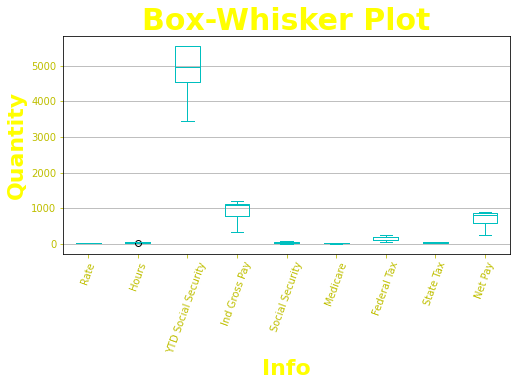

In [115]:
# Box-Whisker plot   #plt.bar(x,y)
font = {'family' : 'normal', 
        'color' : 'yellow',
        'weight' : 'bold',
        'size'   : 22}       

font2 = {'family' : 'normal', 
        'color' : 'yellow',
        'weight' : 'bold',
        'size'   : 30}      

pt = df.boxplot(rot=70, color= 'c', figsize=(8,4))
pt.set_title('Box-Whisker Plot', fontdict= font2)
pt.set_xlabel('Info', fontdict= font)
pt.set_ylabel('Quantity', fontdict= font)
#pt.spines['left'].set_color('yellow')
pt.grid(axis='x')
pt.tick_params(axis='x', colors='y')
pt.tick_params(axis='y', colors='y')



In [111]:
# All info. of a single employee
df.loc["Linus Breeze"]

Rate                     27.50
Hours                    40.25
YTD Social Security    4974.00
Ind Gross Pay          1110.31
Social Security          68.84
Medicare                 16.10
Federal Tax             191.29
State Tax                35.53
Net Pay                 798.55
Name: Linus Breeze, dtype: float64

In [112]:
# single value for row/columns par
df.at["Lee Chang", "Hours"]

28.0

In [113]:
df.loc[df["Hours"] > 40]

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27.50,40.25,4974.0,1110.31,68.84,16.10,191.29,35.53,798.55
Juan Santiago,18.75,56.00,5540.2,1200.00,13.70,17.40,232.31,38.40,898.19
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.00,15.51,167.77,34.23,852.11


In [ ]:
payroll_tax_data = pd.read_csv('payroll_tax_data.csv')


In [ ]:
payroll_tax_data.head()

,Case,Social_Security_tax,Medicare_tax
0,1,0.080,0.0275
1,2,0.105,0.2250
